In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

# 혼동 행렬 생성
cm = confusion_matrix(y, y_pred)

print("혼동 행렬(오차 행렬):")
print(cm)

혼동 행렬(오차 행렬):
[[337  20]
 [ 30 182]]


**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

정확도(Accuracy)는 모델이 전체 데이터 중에서 얼마나 맞췄는가를 나타내는 가장 기본적인 성능 지표이다.
즉, 예측이 실제 정답과 일치한 비율을 의미한다.

공식: (정답으로 예측한 개수/ 전체 데이터 개수)

전체 샘플 중 약 91.2%를 모델이 정확하게 예측했다. 양성과 악성 모두 포함해서 대부분의 데이터를 올바르게 분류했음을 알 수 있다.

In [4]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9121265377855887


**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

정밀도는 모델이 악성이라고 예측한 것들 중 실제로 악성인 비율이다.

공식 : (TP / TP +FP)

TP : 실제 악성인데 악성이라고 맞춘 경우
FP : 실제 양성인데 악성이라고 잘못 예측한 경우

정밀도 0.901은 모델이 악성이라고 예측했을 때, 약 90%는 실제 악성으로 정확히 맞췄다는 뜻이며,
모델 예측이 충분히 신뢰할만 함을 알 수 있다.

In [5]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred)
print("Precision:", precision)

Precision: 0.900990099009901


**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

재현율은 모델이 실제로 악성인 데이터 중에서, 악성이라고 올바르게 예측한 비율이다.

공식 : (TP/TP+FN)

재현율이 높을수록 모델은 악성(또는 관심 있는 클래스)을 놓치지 않는다는 의미한다. 따라서 이는 실제 악성 환자를 잘 잡아냄을 확인할 수 있다.

재현율 0.8585는 모델이 실제 악성 샘플 중 약 86%를 올바르게 감지했지만, 일부(약 14%)는 놓쳤음을 알 수 있다.

In [7]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
print("Recall:", recall)

Recall: 0.8584905660377359


**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

정밀도와 재현율을 결합한 지표. F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값.

공식 : F1 = 2 x (precision x recall)/(precision + recall)

F1 = 0.8792는 모델이 악성과 양성을 잘 구분하며, 신뢰할 만한 예측 결과를 제공함을 알 수 있다.

In [9]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
print("F1:", f1)


F1: 0.8792270531400966


**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [10]:
from sklearn.preprocessing import Binarizer

# 예측 확률 구하기
y_proba = model_lor.predict_proba(X)

# 클래스 0(양성)일 확률만 추출
y_proba_0 = y_proba[:, 0].reshape(-1, 1)  # 2D 배열로 변환

# 기준(threshold) = 0.1
# Binarizer는 threshold보다 큰 값을 1로, 이하면 0으로 바꾼다
binarizer = Binarizer(threshold=0.1)
y_pred2_temp = binarizer.transform(y_proba_0)

# 지금은 1이 "P(0)>0.1"일 때라서 0/1이 반대로 되어 있음
# 문제에서 0으로 예측할 확률이 0.1보다 크면 y_pred2=0 → 반전 필요
y_pred2 = 1 - y_pred2_temp.flatten()

print(y_pred2[:10])

[1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]


In [11]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 혼동행렬
cm = confusion_matrix(y, y_pred2)
print("혼동행렬(Confusion Matrix):\n", cm)

# 정확도
accuracy = accuracy_score(y, y_pred2)
print("\n정확도(Accuracy):", accuracy)

# 정밀도
precision = precision_score(y, y_pred2)
print("정밀도(Precision):", precision)

# 재현율
recall = recall_score(y, y_pred2)
print("재현율(Recall):", recall)

# F1 점수
f1 = f1_score(y, y_pred2)
print("F1 점수(F1 Score):", f1)


혼동행렬(Confusion Matrix):
 [[356   1]
 [ 73 139]]

정확도(Accuracy): 0.8699472759226714
정밀도(Precision): 0.9928571428571429
재현율(Recall): 0.6556603773584906
F1 점수(F1 Score): 0.7897727272727273


**ROC 곡선 시각화**

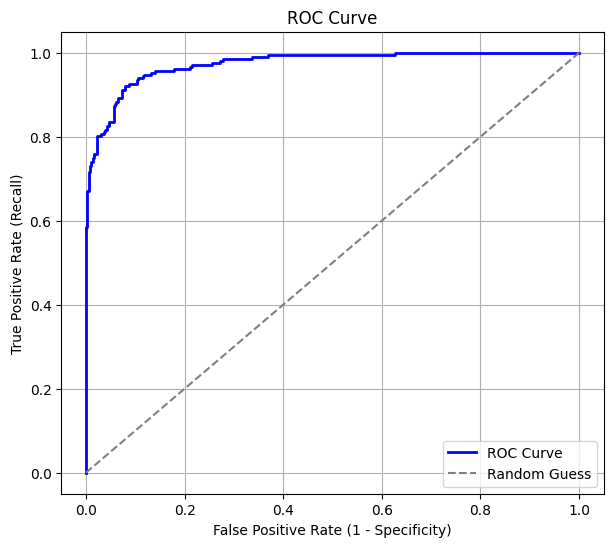

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 예측 확률 (클래스 1, 악성일 확률)
y_proba = model_lor.predict_proba(X)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y, y_proba)

# 시각화
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

ROC AUC 값이 약 0.97인 것을 통해 모델이 악성과 양성을 거의 완벽하게 구분할 수 있음을 알 수 있다.

In [15]:
from sklearn.metrics import roc_auc_score

# 예측 확률
y_proba = model_lor.predict_proba(X)[:, 1]

# AUC 계산
auc_score = roc_auc_score(y, y_proba)
print("ROC AUC:", auc_score)


ROC AUC: 0.974076423022039
